# Raport - Symulacje Komputerowe

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import gcd as gcd
import time

## Zadanie 1

Celem zadania było zaimplementowanie generatora liczb pseudolosowych opartego na metodzie k-tego rzędu, oraz przeprowadzenie analizy jego działania. Generator ACORN jest oparty na ciągach rekurencyjnych i zapewnia własności zbliżone do idealnych cech generatorów losowych, takich jak równomierność rozkładu. 

Aby generować liczby losowe z przedziału [0, 1] zdefiniowaliśmy najpierw funkcję find_coprime, która znajduje liczbę względnie pierwszą z liczbą M. Aby liczba ta nie była zbyt mała (skutkowałoby to generowaniem małych liczb pseudolosowych), szukamy wartości, która jest większa od pierwiastka z liczby M. Dzięki tak dobranemu parametrowi, nie musimy pomijać tak dużej ilości pierwszych wyrazów (Lag). 

Po zdefiniowaniu ziarna, iteracyjnie aktualizujemy wartości na liście x, którą po znormalizowaniu zwracamy.

In [6]:
def coprime(a, b):
    """
    Funkcja sprawdza, czy dwie liczby są względnie pierwsze. Wykorzystuje do tego funkcję gcd z pakietu math, która znajduje największy wspólny dzielnik za pomocą algorytmu Euklidesa.
    :return: Funkcja zwraca wartość True, gdy liczby są względnie pierwsze i False, gdy liczby nie są względnie pierwsze.
    """
    return gcd(a, b) == 1


def find_coprime(a):
    """
    Funkcja zwraca liczbę względnie pierwszą do liczby zadanej jako parametr. 
    :param a: Liczba, dla której szukamy liczby względnie pierwszej
    :return: Funkcja zwraca liczbę względnie pierwszą, większą od pierwiastka z liczby a
    """
    if a == 1:
        raise "Number must be grater than 2"
    for i in range(int(np.power(a, 0.5)), a):
        if coprime(a, i):
            return i
    return None


def ACORN(N, k, M, Lag):
    """
    Funkcja zwraca N liczb pseudolosowych, generowanych przy pomocy generatora ACORN. W przypadku naszego generatora ziarno (seed) to kolumna (lista), której pierwszym elementem jest liczba względnie pierwsza z liczbą M, a pozostałe k elementów to zera.
    :param N: Liczba liczb pseudolosowych, które chcemy wygenerować.
    :param k: Rząd 
    :param M: Liczba naturalna, 
    :param Lag: Liczba ominiętych wyrazów
    :return: 
    """
    N += Lag
    seed = [find_coprime(M)] + [0 for _ in range(k)]    # Inicjalizujemy zerową kolumnę
    x = [seed[0] for _ in range(N)]                     # Inicjalizujemy pierwszy wiersz, który będzie aktualizowany w pętli
    for i in range(k):
        x[0] = (seed[i] + x[0]) % M                     # Aktualizujemy pierwszy wyraz w i-tym wierszu
        for j in range(1, N):
            x[j] = (x[j - 1] + x[j]) % M                # Aktualizujemy pozostałe wyrazy w i-tym wierszu
    return [x[i] / M for i in range(Lag, N)]            # Zwracamy N liczb pseudolosowych po ominięciu Lag pierwszych wyrazów

Na pierwszym wykresie, zatytułowanym "Wykres ciągu $Y_{n-1}^k \rightarrow Y_n^k$", obserwujemy rozmieszczenie punktów reprezentujących kolejne wartości pseudolosowe wygenerowane przez generator ACORN. Punkty te są rozmieszczone w sposób losowy i chaotyczny, co sugeruje, że zarówno ciąg $Y_n^k$, jak i ciąg $Y_{n-1}^k$ zachowują się w sposób chaotyczny i nie wykazują żadnych widocznych wzorców czy korelacji.

Na drugim wykresie przedstawiony został unormowany histogram wartości generowanych przez generator ACORN. Histogram ten reprezentuje gęstość rozkładu zmiennych losowych. Słupki histogramu są zbliżonej wysokości, co sugeruje, że wartości są równomiernie rozłożone w przedziale [0, 1].

Wysokość słupków histogramu oscylująca wokół wartości 1 dowodzi, że generator skutecznie generuje liczby losowe z rozkładu jednostajnego. Równomierny rozkład wartości jest kluczowym aspektem potwierdzającym poprawność działania generatora, ponieważ liczby powinny być równomiernie rozproszone w całym zakresie.

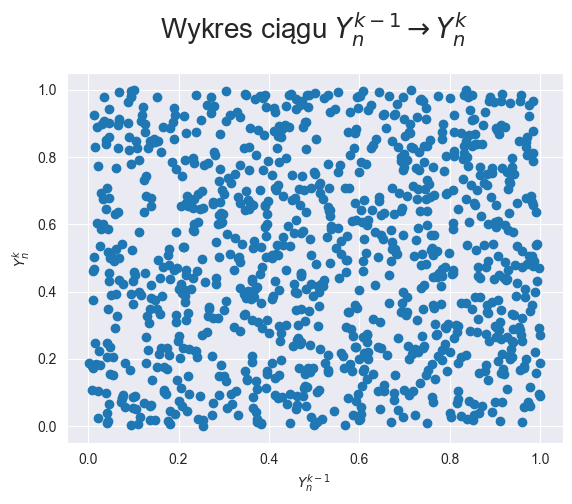

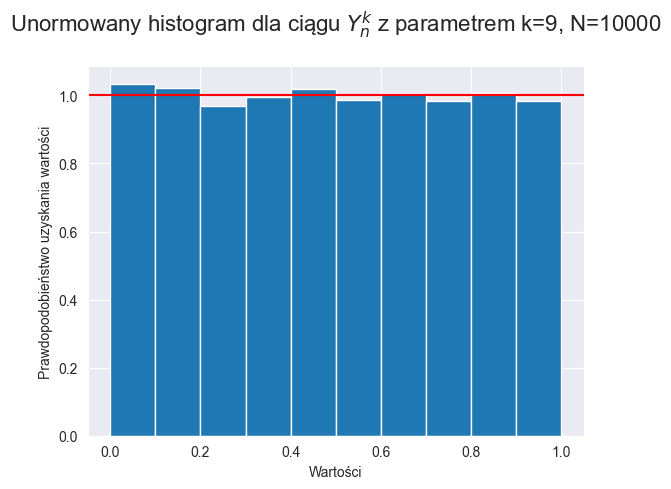

In [21]:
N = 1000
k = 9
M = 2 ** 89 - 1
Lag = 10 ** 3

x1 = ACORN(N=N, k=k-1, M=M, Lag=Lag)
x2 = ACORN(N=N, k=k, M=M, Lag=Lag)
x = ACORN(N=10*N, k=k, M=M, Lag=Lag)

plt.scatter(x1, x2)
plt.title(r"Wykres ciągu $Y_n^{k-1} \rightarrow Y_n^k$", fontsize=20, pad=25)
plt.xlabel(r"$Y_n^{k-1}$")
plt.ylabel(r"$Y_n^k$")
plt.grid(True)
plt.show()

plt.hist(x, density=True)
plt.axhline(y=1, color='r')
plt.title(rf"Unormowany histogram dla ciągu $Y_n^k$ z parametrem k={k}, N={10*N}", fontsize=16, pad=25)
plt.xlabel("Wartości")
plt.ylabel("Prawdopodobieństwo uzyskania wartości")
plt.grid(True)
plt.show()

Jednym z celów zadania było porównanie wydajności zaimplementowanego generatora ACORN z generatorem wbudowanym w bibliotekę numpy. Aby to osiągnąć, porównaliśmy czas działania naszego generatora oraz generatora wbudowanego, np.random.uniform, stosowanego do generowania liczb pseudolosowych z rozkładu jednostajnego.  


#### Wyniki porównania

Jak widać na wykresie, generator wbudowany w bibliotekę numpy działa znacznie szybciej niż nasz zaimplementowany generator ACORN. Mimo tej różnicy, nasz generator wykazuje względnie dobrą wydajność, generując $10^5$ liczb losowych w czasie około $0.34$ sekundy.

Porównanie wydajności pokazuje, że choć generator wbudowany w numpy jest bardziej optymalny pod względem czasu działania, nasz generator ACORN również charakteryzuje się akceptowalną wydajnością.

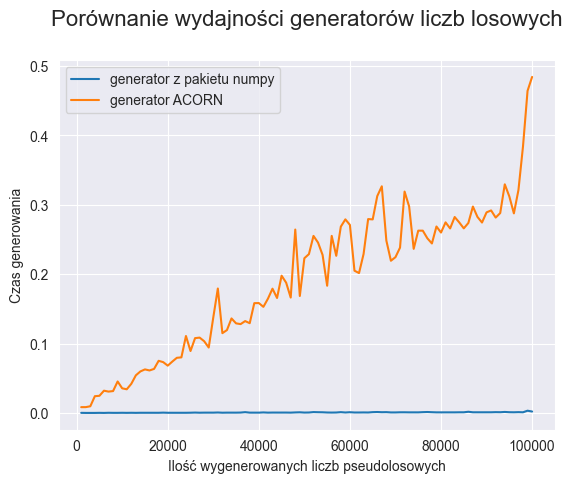

In [22]:
def measure_time(function, argument_list, a=10):
    start_time = time.time()
    for i in range(a):
        function(*argument_list)
    times = time.time() - start_time
    return times / a

M = 2 ** 64 - 1
n = 1000
a = 100

np_times = np.zeros(a)
acorn_times = np.zeros(a)
n_list = np.zeros(a)
for i in range(a):
    np_times[i] = measure_time(np.random.uniform, [0, 1, (i+1)*n])
    acorn_times[i] = measure_time(ACORN, [(i+1)*n, k, M, Lag])
    n_list[i] = (i+1)*n


plt.plot(n_list, np_times, label="generator z pakietu numpy")
plt.plot(n_list, acorn_times, label="generator ACORN")
plt.title("Porównanie wydajności generatorów liczb losowych", fontsize=16, pad=25)
plt.xlabel("Ilość wygenerowanych liczb pseudolosowych")
plt.ylabel("Czas generowania")
plt.legend()
plt.show()

## Zadanie 6

Celem zadania było zweryfikowanie symulacyjnie praw arcusa sinusa dla procesu Wienera. Prawa te opisują różne aspekty procesu Wienera, takie jak czas spędzony powyżej osi OX, ostatni moment uderzenia w oś OX, oraz moment osiągnięcia maksymalnej wartości. 

W pierwszym etapie zadania zdefiniowaliśmy funkcje, które generują wykresy dla teoretycznych dystrybuant oraz funkcji gęstości prawdopodobieństwa rozkładu arcsin.

In [9]:
def arcsin_distribution_function(n=1000):
    """
    Funckja zwraca listę argumentów i wartości dystrybuanty dla rozkładu arcsin.
    :param n: Liczba elementów, na jakie podzielimy odcinek [0, 1]
    :return: Funkcja zwraca listę argumentów i odpowiadającą jej listę wartości.
    """
    x = np.linspace(0, 1, n)
    y = 2 / np.pi * np.arcsin(np.sqrt(x))
    return x, y


def arcsin_density(n=1000):
    """
    Funckja zwraca listę argumentów i wartości funkcji gęstości dla rozkładu arcsin.
    :param n: Liczba elementów, na jakie podzielimy odcinek [0, 1] - gęstość ma wartość różną od zera na odcinku [0, 1]
    :return: Funkcja zwraca listę argumentów i odpowiadającą jej listę wartości.
    """
    x = np.linspace(0.005, 0.995, n)
    y = 1 / (np.pi * np.sqrt(x * (1 - x)))
    return x, y

W następnym etapie zadania zdefiniowaliśmy funkcję wiener, która generuje jedną realizację procesu Wienera i zwraca wartości $t_1$, $t_2$ oraz $t_3$. Wartości te odpowiadają kolejno: czasowi spędzonemu przez proces Wienera nad osią OX, ostatniemu punktowi przecięcia procesu z osią OX oraz momentowi w czasie, dla którego proces Wienera osiągnął wartość maksymalną. Te wartości weryfikują odpowiednio pierwsze, drugie i trzecie prawo arcusa sinusa.

Należy pamiętać, że wartości $t_1$, $t_2$ i $t_3$ są przybliżone. Proces Wienera jest ciągły, a każda jego część, nawet minimalnej długości, jest osobną realizacją. Nasza funkcja aproksymuje te wartości czasowe, a dokładność aproksymacji rośnie wraz ze zwiększeniem liczby podziałów odcinka [0, 1].

Po zaimplementowaniu funkcji generującej zmienne losowe dla pojedynczej realizacji procesu Wienera, możemy wygenerować $m$ trajektorii i dla każdej z nich obliczyć konkretne wartości czasowe. Funkcja arcsin_law, zdefiniowana jako iteracyjne wywołanie funkcji wiener, oblicza wartości $t_1$, $t_2$ i $t_3$ dla kolejnych realizacji procesu Wienera, a na koniec zwraca listy z obliczonymi wartościami zmiennych losowych.

In [10]:
def zero_of_function(value1, value2):
    if value1 * value2 < 0:
        return True
    return False

def wiener(n):
    """
    Funkcja oblicza wartości dla pojedynczej realizacji procesu Wienera, generowanego na odcinku [0, 1].
    :param n: liczba porównywanych skoków czasowych
    :return: wartości t1, t2 i t3 - pojedyncze wartości czasów
    """
    
    # Generowanie momentów czasowych, dla których będziemy porównywać wartości 
    times = np.sort(np.concatenate((np.random.uniform(0, 1, n - 1), np.array([0, 1]))))
    Bt = 0
    Bt_max = 0 
    t1, t2, t3 = 0, 0, 0
    for i in range(n):
        # Obliczanie zmiany procesu Wienera dla kolejnego kroku czasowego
        delta_Bt = np.random.normal(0, np.sqrt(times[i + 1] - times[i]))
        Bt_next = Bt + delta_Bt
        
        # Sprawdzenie, czy w przedziale t[i], t[i+1] znajduje się miejsce zerowe
        if zero_of_function(Bt, Bt_next):
            t2 = times[i]
        Bt = Bt_next
        
        # Sprawdzenie, czy wartość procesu znajduje się ponad osią OX
        if Bt > 0:
            t1 += times[i + 1] - times[i]
            
        # Sprawdzenie, czy w przedziale t[i], t[i+1] znajduje się maksymalna wartość procesu Wienera
        if Bt > Bt_max:
            Bt_max = Bt
            t3 = times[i]
            
    return t1, t2, t3


def arcsin_law(m, n):
    """
    Funkcja zwraca trzy listy, każda z list weryfikuje kolejne prawa arcusa sinusa.
    :param m: Ilość symulacji procesu Wienera
    :param n: Liczba kroków czasowych
    :return: t1, t2, t3 - listy z m wartościami zmiennych losowych 
    """
    t1, t2, t3 = np.zeros(m), np.zeros(m), np.zeros(m)
    for i in range(m):
        t1[i], t2[i], t3[i] = wiener(n)
    return t1, t2, t3

In [18]:
m = 2000        # Ilość symulacji procesu Wienera
n = 1000        # Liczba kroków czasowych

t1, t2, t3 = arcsin_law(m=m, n=n)

Po wygenerowaniu list z wartościami zmiennych losowych, możemy obliczyć wykresy, które posłużą jako jądrowy estymator dystrybuanty i gęstości. Wszystkie trzy przedstawione rysunki zawierają dwa porównania: porównanie teoretycznej gęstości rozkładu arcsin z histogramem reprezentującym gęstość oraz porównanie teoretycznej dystrybuanty z estymatorem dystrybuanty wygenerowanym przy użyciu funkcji ecdfplot z pakietu seaborn.

Jak można zauważyć, zarówno wykres dystrybuanty teoretycznej, jak i gęstości, pokrywają się w znacznym stopniu z wykresem dystrybuanty empirycznej dla danej próby oraz histogramem. Wyniki te potwierdzają zgodność z prawami arcusa sinusa.

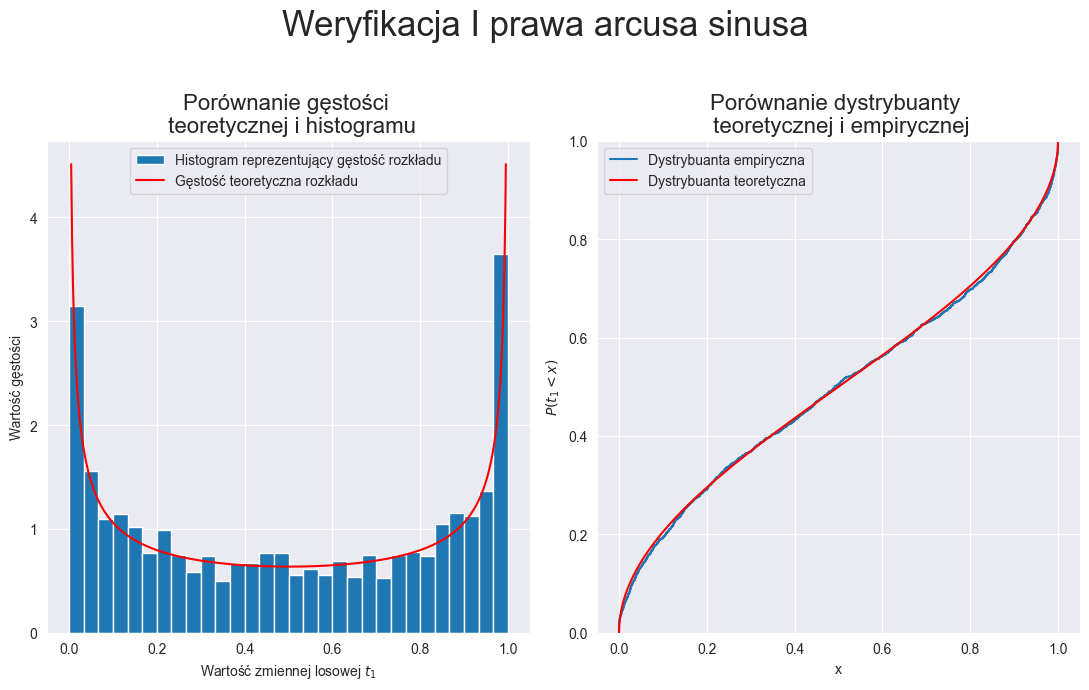

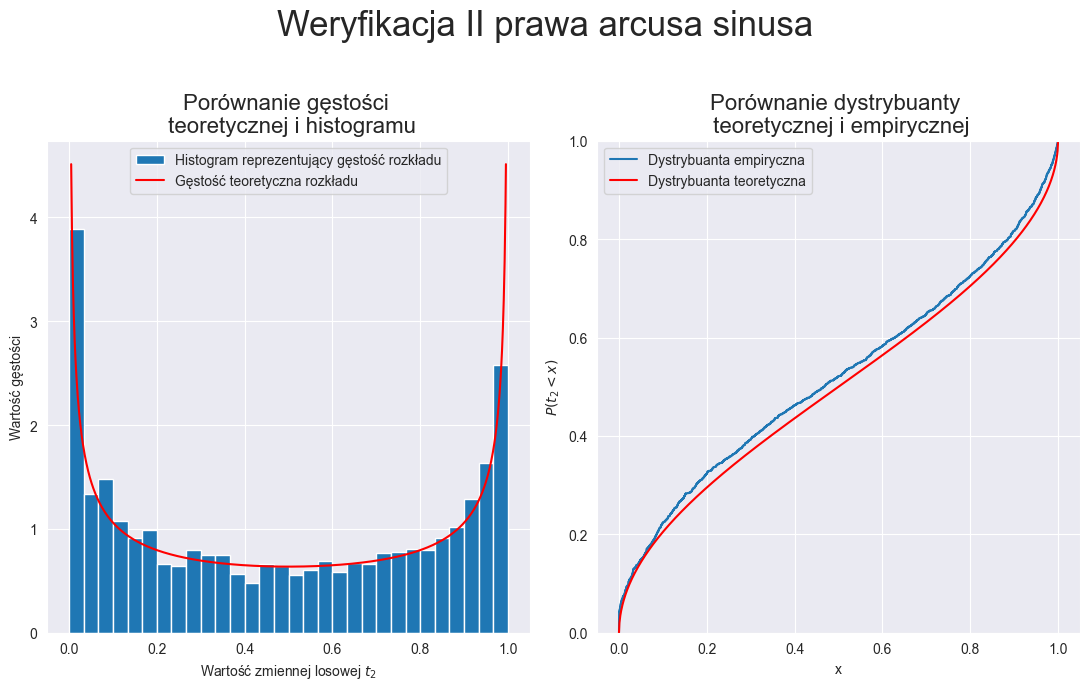

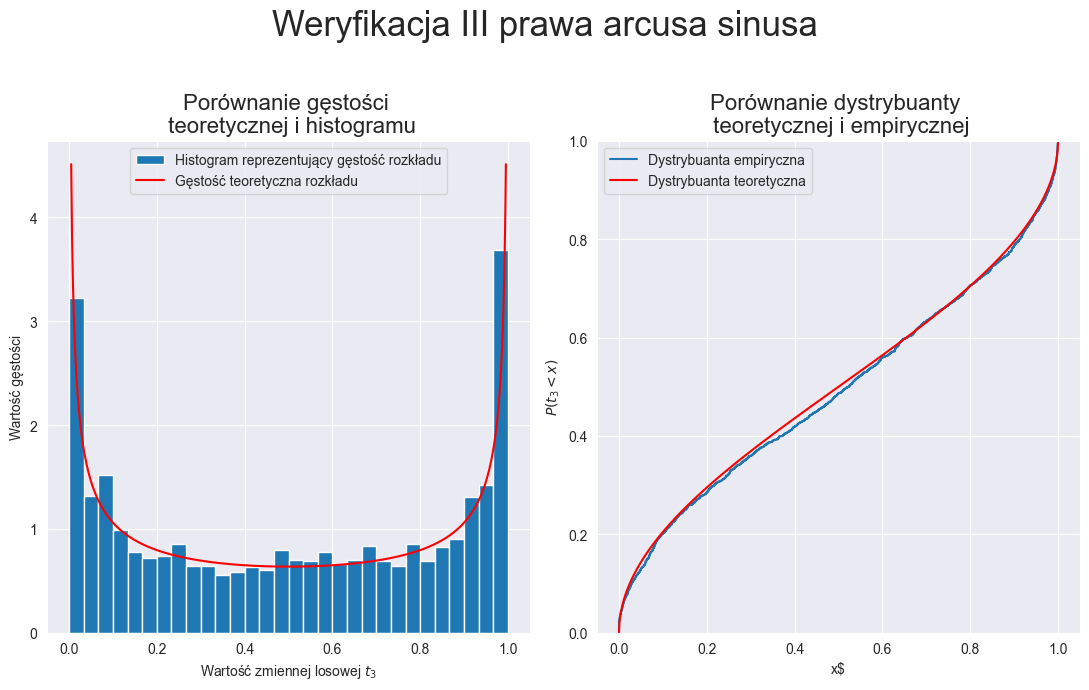

In [28]:
# Generowanie wykresów

plt.figure(figsize=(11, 7))

plt.subplot(1, 2, 1)
plt.hist(t1, bins=30, density=True, label="Histogram reprezentujący gęstość rozkładu")
plt.plot(*arcsin_density(), color='r', label="Gęstość teoretyczna rozkładu")
plt.title("Porównanie gęstości \n teoretycznej i histogramu", fontsize=16, ha='center')
plt.xlabel("Wartość zmiennej losowej $t_1$")
plt.ylabel("Wartość gęstości")
plt.legend()

plt.subplot(1, 2, 2)
sns.ecdfplot(t1, label="Dystrybuanta empiryczna")
plt.plot(*arcsin_distribution_function(), color='r', label="Dystrybuanta teoretyczna")
plt.title("Porównanie dystrybuanty \n teoretycznej i empirycznej", fontsize=16, ha='center')
plt.xlabel("x")
plt.ylabel(r"$P(t_1 < x)$")
plt.legend()

plt.suptitle("Weryfikacja I prawa arcusa sinusa", fontsize=25, ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


plt.figure(figsize=(11, 7))

plt.subplot(1, 2, 1)
plt.hist(t2, bins=30, density=True, label="Histogram reprezentujący gęstość rozkładu")
plt.plot(*arcsin_density(), color='r', label="Gęstość teoretyczna rozkładu")
plt.title("Porównanie gęstości \n teoretycznej i histogramu", fontsize=16)
plt.xlabel("Wartość zmiennej losowej $t_2$")
plt.ylabel("Wartość gęstości")
plt.legend()

plt.subplot(1, 2, 2)
sns.ecdfplot(t2, label="Dystrybuanta empiryczna")
plt.plot(*arcsin_distribution_function(), color='r', label="Dystrybuanta teoretyczna")
plt.title("Porównanie dystrybuanty \n teoretycznej i empirycznej", fontsize=16)
plt.xlabel("x")
plt.ylabel(r"$P(t_2 < x)$")
plt.legend()

plt.suptitle("Weryfikacja II prawa arcusa sinusa", fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


plt.figure(figsize=(11, 7))

plt.subplot(1, 2, 1)
plt.hist(t3, bins=30, density=True, label="Histogram reprezentujący gęstość rozkładu")
plt.plot(*arcsin_density(), color='r', label="Gęstość teoretyczna rozkładu")
plt.title("Porównanie gęstości \n teoretycznej i histogramu", fontsize=16)
plt.xlabel("Wartość zmiennej losowej $t_3$")
plt.ylabel("Wartość gęstości")
plt.legend()

plt.subplot(1, 2, 2)
sns.ecdfplot(t3, label="Dystrybuanta empiryczna")
plt.plot(*arcsin_distribution_function(), color='r', label="Dystrybuanta teoretyczna")
plt.title("Porównanie dystrybuanty \n teoretycznej i empirycznej", fontsize=16)
plt.xlabel("x$")
plt.ylabel(r"$P(t_3 < x)$")
plt.legend()

plt.suptitle("Weryfikacja III prawa arcusa sinusa", fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()